<a href="https://colab.research.google.com/github/Naveen-01A/Netflix_Data_analysis/blob/main/Netflix_Stock_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime


In [ ]:
df = pd.read_csv('/content/Netflix.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4874.000000,4874.000000,4874.000000,4874.000000,4874.000000,4.874000e+03
mean,104.644811,106.243736,103.006660,104.686524,104.686524,1.681687e+07
std,155.886656,158.173217,153.546958,155.940368,155.940368,1.937625e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,3.901429,3.977143,3.835357,3.905714,3.905714,6.301225e+06
50%,21.386429,21.816429,20.935714,21.233572,21.233572,1.084630e+07
75%,125.445000,126.592499,122.987499,125.097502,125.097502,2.016192e+07
max,608.049988,619.000000,608.049988,610.340027,610.340027,3.234140e+08


In [6]:
sns.set(rc={'figure.figsize' : (10,5)})

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date') #set the date as column number
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


Text(0.5, 1.0, 'Volume of Stock vs Time')

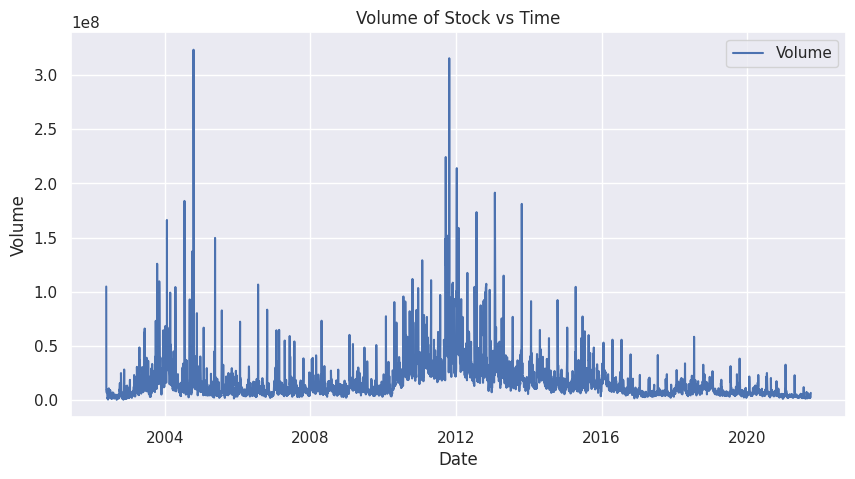

In [8]:
sns.lineplot(x=df.index, y = df['Volume'], label = 'Volume')
plt.title('Volume of Stock vs Time')

<Axes: title={'center': 'Netflix Stock'}, xlabel='Date'>

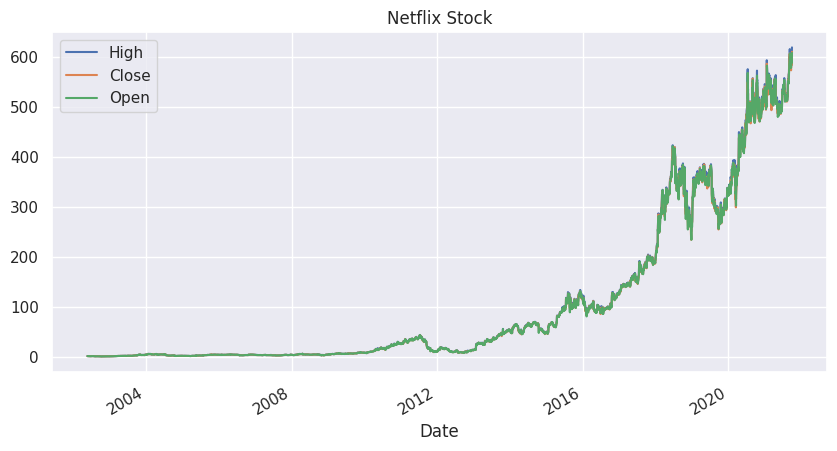

In [9]:
df.plot(y= ['High','Close','Open'], title = 'Netflix Stock')

<Axes: xlabel='Year'>

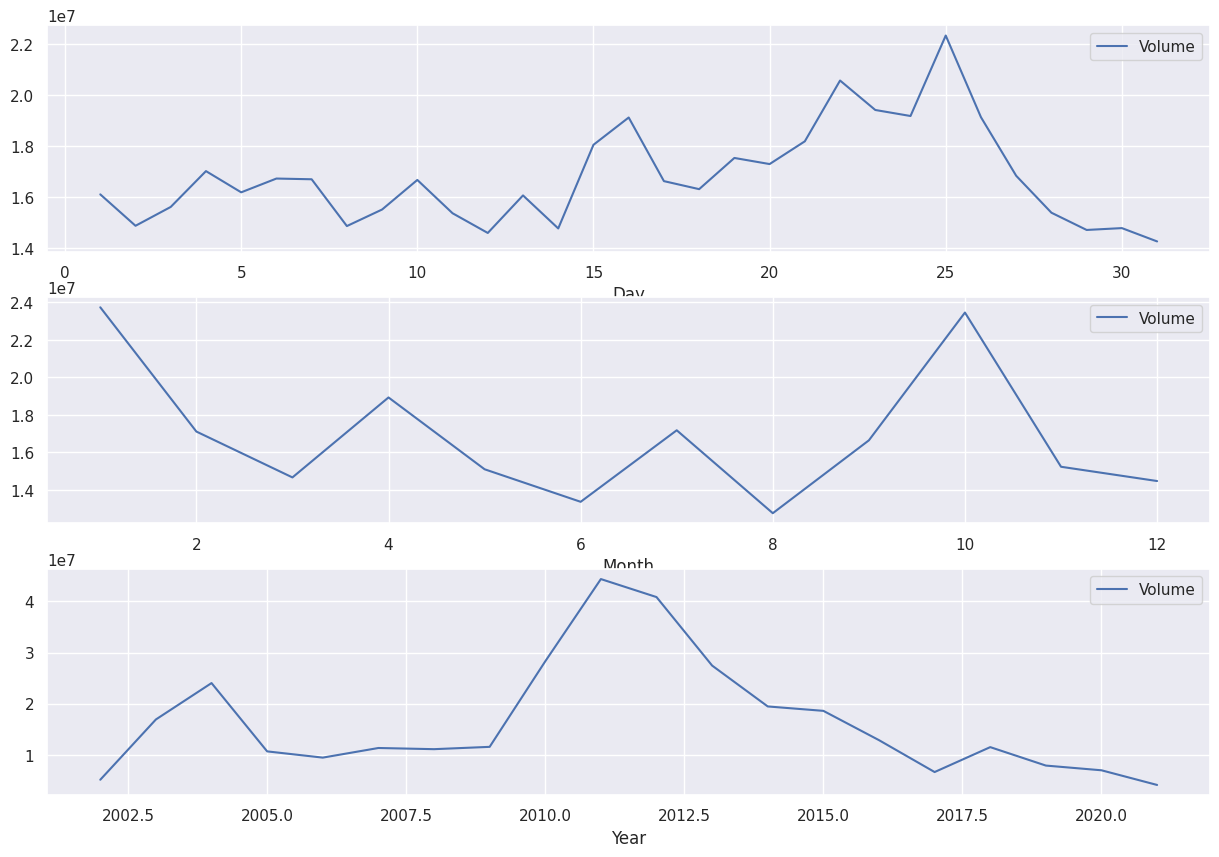

In [12]:
fig, (ax1,ax2,ax3) = plt.subplots(3, figsize = (15,10))
df.groupby(df.index.day).mean().plot(y = 'Volume', ax =ax1,xlabel='Day')
df.groupby(df.index.month).mean().plot(y = 'Volume', ax = ax2, xlabel = 'Month')
df.groupby(df.index.year).mean().plot(y = 'Volume', ax = ax3, xlabel = 'Year')

In [13]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...
2021-09-24,592.500000,592.979980,583.640015,592.390015,592.390015,2124800
2021-09-27,587.950012,593.580017,576.929993,592.640015,592.640015,2504700
2021-09-28,589.000000,599.539978,580.159973,583.849976,583.849976,4431100


### Dates with Highest Stock Price

In [17]:
a = df.sort_values(by = 'High', ascending = False).head(10)
a['High']

,High
Date,
2021-09-30,619.000000
2021-09-08,615.599976
2021-09-07,613.849976
2021-09-29,609.880005
2021-09-10,609.450012
2021-09-09,609.440002
2021-09-28,599.539978
2021-09-23,599.320007
2021-09-02,598.760010


### Dates with Lowest Stock Price

In [18]:
b = df.sort_values(by = 'Low', ascending= True).head(10)
b['Low']

,Low
Date,
2002-10-10,0.346429
2002-10-09,0.347143
2002-10-07,0.382143
2002-10-08,0.390714
2002-10-16,0.442857
2002-10-11,0.446429
2002-10-04,0.447143
2002-10-14,0.463571
2002-10-17,0.471429


<Axes: xlabel='Date', ylabel='Low'>

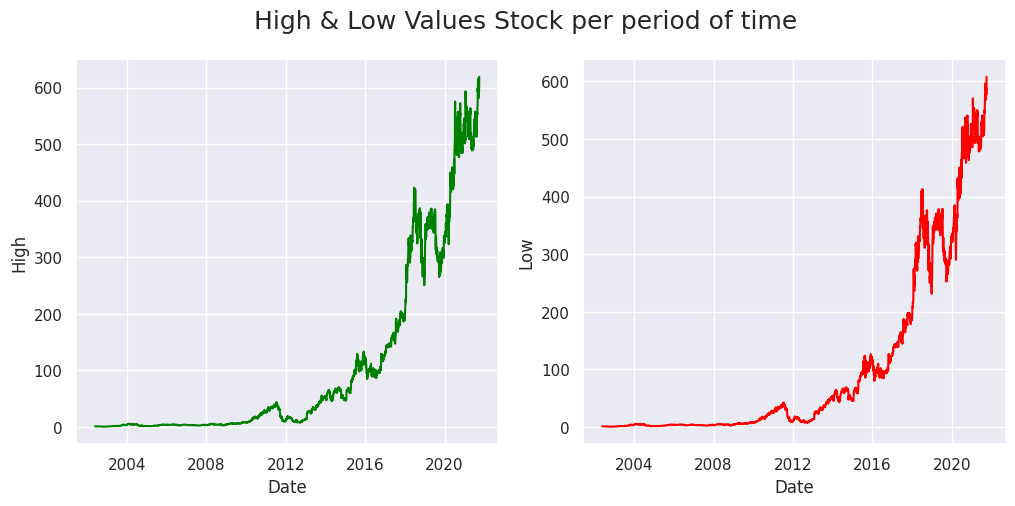

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex = True, figsize = (12,5))
fig.suptitle('High & Low Values Stock per period of time', fontsize =18)
sns.lineplot(ax = axes[0], y = df['High'], x = df.index, color = 'green')
sns.lineplot(ax = axes[1], y = df['Low'], x = df.index, color = 'red')